In [1]:
#Credit card Fraud Detection using CNN in TensorFlow 2.0
#added max pool dropout, batch normalization to improvize accuracy
#plot learning curve and with this learning curve how u can understand whether 
# ypur model is overfitting / underfitting

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D 

print(tf.__version__)

2.3.0


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<h3>Balance Dataset</h3>

In [10]:
non_fraud = df[df['Class']==0]
fraud = df[df['Class']==1]
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [11]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [13]:
df = fraud.append(non_fraud,ignore_index=True)

In [14]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,47010.0,-0.448961,0.896684,2.341584,2.888895,0.303901,0.442783,0.462225,-0.002784,-0.817467,...,-0.307860,-0.710538,-0.208559,-0.167136,0.077391,0.111677,-0.085532,-0.137062,13.76,0
980,72193.0,-0.448972,0.597013,1.177152,-1.357538,-1.371519,-1.352359,-0.065869,0.181118,0.659703,...,0.129361,0.377922,0.223121,0.982830,-0.572148,-0.129418,-0.140857,-0.024956,36.50,0
981,84524.0,1.367925,-0.540061,0.337732,-0.764199,-0.806632,-0.419428,-0.508571,-0.183421,-0.850676,...,-0.628214,-1.388627,0.109795,-0.441735,0.025678,0.790195,-0.042053,0.018793,41.90,0
982,172333.0,-0.772799,1.565483,-1.676630,-0.858090,0.777246,-0.037314,0.144481,0.963798,-0.368072,...,-0.308379,-0.969788,0.061001,-0.519626,-0.218552,0.169274,0.090193,-0.022253,17.48,0


In [15]:
df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [16]:
X = df.drop('Class',axis=1)
y = df['Class']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [18]:
X_train.shape, X_test.shape

((787, 30), (197, 30))

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [22]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [23]:
X_train.shape,X_test.shape

((787, 30, 1), (197, 30, 1))

<h3>Build CNN</h3>

In [25]:
epochs = 20
model = Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)             

In [27]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001),loss="binary_crossentropy",metrics=['accuracy'] )

In [29]:
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6207 - accuracy: 0.7814 - val_loss: 0.5630 - val_accuracy: 0.8934
Epoch 2/20
25/25 [==============================] - 0s 6ms/step - loss: 0.4593 - accuracy: 0.8310 - val_loss: 0.5260 - val_accuracy: 0.9239
Epoch 3/20
25/25 [==============================] - 0s 7ms/step - loss: 0.4714 - accuracy: 0.8399 - val_loss: 0.4889 - val_accuracy: 0.9391
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 0.3889 - accuracy: 0.8539 - val_loss: 0.4673 - val_accuracy: 0.8985
Epoch 5/20
25/25 [==============================] - 0s 6ms/step - loss: 0.3462 - accuracy: 0.8780 - val_loss: 0.4432 - val_accuracy: 0.8782
Epoch 6/20
25/25 [==============================] - 0s 6ms/step - loss: 0.3590 - accuracy: 0.8831 - val_loss: 0.4203 - val_accuracy: 0.8680
Epoch 7/20
25/25 [==============================] - 0s 7ms/step - loss: 0.3101 - accuracy: 0.8983 - val_loss: 0.3895 - val_accuracy: 0.8832
Epoch 8/20
25/25 [==

In [30]:
# training_accuracy = 0.9339
# validation_accuracy = 0.9289
#There is some difference in that way we can say our model is overfitting

In [31]:
def plot_learningCurve(history,epoch):
    #plot training abd validation accuracy values
    epoch_range = range(1,epoch+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
    
    #plot training abd validation loss values
    epoch_range = range(1,epoch+1)
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
    

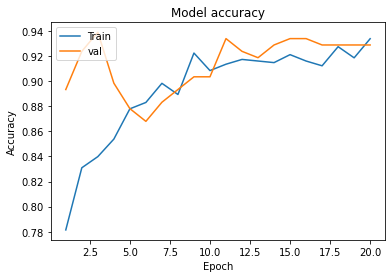

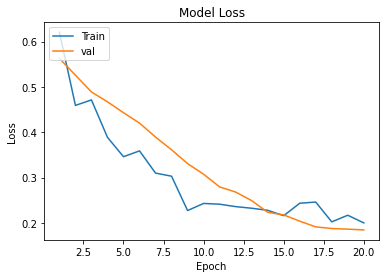

In [32]:
plot_learningCurve(history,epochs)

<h3>Adding MaxPool</h3>

In [33]:
epochs = 50
model = Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [34]:
model.compile(optimizer=Adam(lr=0.0001),loss="binary_crossentropy",metrics=['accuracy'] )

In [35]:
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
25/25 [==============================] - 0s 18ms/step - loss: 1.1177 - accuracy: 0.5388 - val_loss: 0.6720 - val_accuracy: 0.6853
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.9323 - accuracy: 0.6302 - val_loss: 0.6472 - val_accuracy: 0.7005
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.7742 - accuracy: 0.6645 - val_loss: 0.6199 - val_accuracy: 0.7614
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.7128 - accuracy: 0.6963 - val_loss: 0.5907 - val_accuracy: 0.7716
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5724 - accuracy: 0.7421 - val_loss: 0.5617 - val_accuracy: 0.7716
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5936 - accuracy: 0.7611 - val_loss: 0.5324 - val_accuracy: 0.7817
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5133 - accuracy: 0.7840 - val_loss: 0.5036 - val_accuracy: 0.7919
Epoch 8/50
25/25 [=

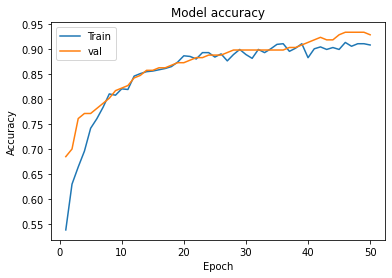

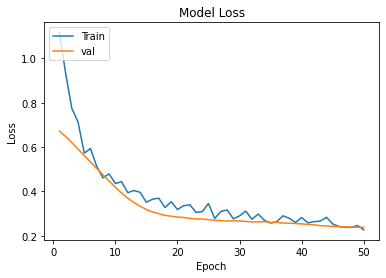

In [36]:
plot_learningCurve(history,epochs)